[과제]
diabetes.csv 데이터 세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.

        - SkinThickness와 Insulin의 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체
        - 정확도, 정밀도, 재현율, f1_score,Roc_auc_score를 포함하는 평가지표 사용자 함수 작성
        - 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
        - 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출.
        - 산출된 임계값을 적용한 평가
        
* 피처 정보
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압), 'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값), 'Insulin'(혈청 인슐린), 'BMI'(체질량 지수),'DiabetesPedigreeFunction'(당뇨 내력 가중치 값),
'Age','Outcomd'


In [1]:
# module import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer

# Seperate module
from sklearn.model_selection import train_test_split

# Machine Learning module
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluation module
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# tune module
from sklearn.model_selection import GridSearchCV

#warings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Dataset EDA

# load Dataset
diabetes = pd.read_csv('../Data/diabetes.csv')
data = diabetes.copy()

# data null
print(data.isnull().sum().sum())  # 0

# replace 0 to mean
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [4]:
# Data Seperate
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Standardscale
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=156)

In [5]:
# Model variation
dclf = DecisionTreeClassifier()
lgr = LogisticRegression()
rclf = RandomForestClassifier()

In [6]:
#fit
models = [dclf,lgr,rclf]
for model in models:
    model.fit(X_train,y_train)

In [7]:
# predict
dclf_pred = dclf.predict(X_test)
lgr_pred = lgr.predict(X_test)
rclf_pred = rclf.predict(X_test)

dclf_proba = dclf.predict_proba(X_test)[:,1]
lgr_proba = lgr.predict_proba(X_test)[:,1]
rclf_proba = rclf.predict_proba(X_test)[:,1]


In [8]:
# Accuracy
print("dclf" , accuracy_score(y_test,dclf_pred))
print("lgr" , accuracy_score(y_test,lgr_pred))
print("rclf" , accuracy_score(y_test,rclf_pred))

dclf 0.6926406926406926
lgr 0.7272727272727273
rclf 0.7402597402597403


In [9]:
# 1st evaluation
def get_clf_eval(y_test, predictions, proba):
    
    # confusion matrix
    confusion = confusion_matrix(y_test, predictions)
    # accuracy_score
    accuracy = accuracy_score(y_test, predictions)
    # precions
    precision = precision_score(y_test, predictions)
#     # recall
    recall = recall_score(y_test, predictions)
    # f1_score
    f1 = f1_score(y_test, predictions)
    # roc_auc
    roc_auc = roc_auc_score(y_test, proba)
    
    print('confusion matrix')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
print('[dclf]\n')
get_clf_eval(y_test,dclf_pred,dclf_proba)
print()
print('[lgr]\n')
get_clf_eval(y_test,lgr_pred,lgr_proba)
print()
print('[rclf]\n')
get_clf_eval(y_test,rclf_pred,rclf_proba)

[dclf]

confusion matrix
[[109  38]
 [ 33  51]]
정확도: 0.6926, 정밀도: 0.5730, 재현율: 0.6071,F1: 0.5896, AUC:0.6743

[lgr]

confusion matrix
[[125  22]
 [ 41  43]]
정확도: 0.7273, 정밀도: 0.6615, 재현율: 0.5119,F1: 0.5772, AUC:0.8162

[rclf]

confusion matrix
[[127  20]
 [ 40  44]]
정확도: 0.7403, 정밀도: 0.6875, 재현율: 0.5238,F1: 0.5946, AUC:0.8095


In [11]:
# threshold & curve visualization
dclf_tprs,dclf_fprs,dclf_thresholds = roc_curve(y_test,dclf_proba)
d_thr_index = np.arange(1,dclf_thresholds.shape[0],5)
print(np.round(dclf_thresholds[d_thr_index],2))
print(np.round(dclf_fprs[d_thr_index],2))
print(np.round(dclf_tprs[d_thr_index],2))
print(d_thr_index)


[1.]
[0.61]
[0.26]
[1]


In [12]:
def roc_curve_plot(y_test,proba):
    fprs,tprs,thresholds = roc_curve(y_test,proba)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = "Random")
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2)) #축 단위 뽑음
    plt.xlim(0,1) 
    plt.ylim(0,1)
    plt.xlabel('FPR(1-specificity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

def AUC(y_test,proba):
    roc_auc = roc_auc_score(y_test, proba)
    print('AUC:{4:.4f}'.format(AUC))

DecisionTree


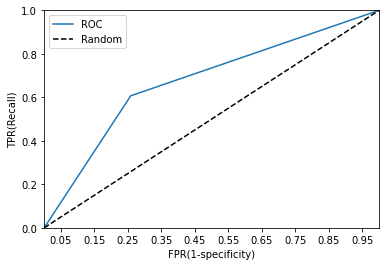

confusion matrix
[[109  38]
 [ 33  51]]
정확도: 0.6926, 정밀도: 0.5730, 재현율: 0.6071,F1: 0.5896, AUC:0.6743
LogistricRegression


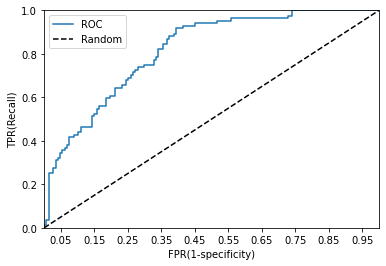

confusion matrix
[[125  22]
 [ 41  43]]
정확도: 0.7273, 정밀도: 0.6615, 재현율: 0.5119,F1: 0.5772, AUC:0.8162
RandomForest


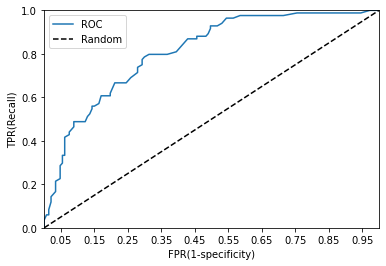

confusion matrix
[[127  20]
 [ 40  44]]
정확도: 0.7403, 정밀도: 0.6875, 재현율: 0.5238,F1: 0.5946, AUC:0.8095


In [13]:
print('DecisionTree')
roc_curve_plot(y_test,dclf_proba)
get_clf_eval(y_test,dclf_pred,dclf_proba)
print('LogistricRegression')
roc_curve_plot(y_test,lgr_proba)
get_clf_eval(y_test,lgr_pred,lgr_proba)
print('RandomForest')
roc_curve_plot(y_test,rclf_proba)
get_clf_eval(y_test,rclf_pred,rclf_proba)

In [14]:
def get_eval_by_threshold(y_test,proba,thresholds):
    #thresholds list 객체내의 값을 차례로 iteration하면서 evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(proba)
        custom_predict = binarizer.transform(proba)
        print('임계값', custom_threshold)
        get_clf_eval(y_test,custom_predict)
        print()

In [15]:
thresholds = [0.4,0.45,0.50,0.55,0.60]
get_eval_by_threshold(y_test, dclf_proba.reshape(-1,1),thresholds)

임계값 0.4


TypeError: get_clf_eval() missing 1 required positional argument: 'proba'